In [2]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import sys
sys.path.append("..")
from tools import data_parser as dp
from gradient_boosting import gradient_boosting_regression

In [3]:
bert_data_512 = "../data/combined_bert_df.csv"
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

The mean squared error (MSE) on test set: 11.9581


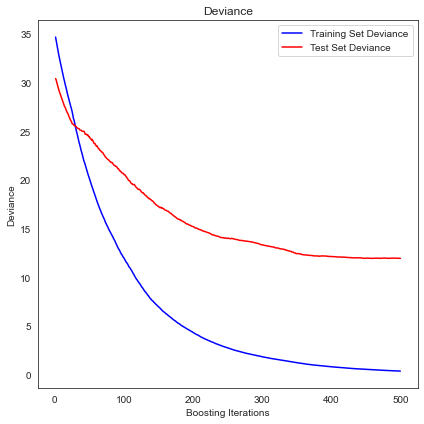

In [4]:
gbr = gradient_boosting_regression(X,y)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import stats

In [27]:
def gradient_boosting_regression(X, y):
    """Gradient Boosting for regression

    Parameters
    ----------
    X : array-like of shape = [n_samples, n_features]
        The training input samples.
    y : array-like, shape = [n_samples]
        The target values (real numbers in regression).

    Returns
    -------
    reg : regression model.
    """
    params = {
        "n_estimators": 5000,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.01,
        "loss": "squared_error",
    }
    sns.set_style(style='white')

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=13
    )

    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)

    mse = mean_squared_error(y_test, reg.predict(X_test))
    mae = mean_absolute_error(y_test, reg.predict(X_test))
    pearsonr = stats.pearsonr(y_test, reg.predict(X_test))
    r2 = r2_score(y_test, reg.predict(X_test))

    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
    print("The pearson coeffieicent on test set: {:.4f}".format(pearsonr[0]))
    print("The r2 on test set: {:.4f}".format(r2))

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(reg.staged_predict(X_test)):
        test_score[i] = mean_absolute_error(y_test, y_pred)

    fig = plt.figure(figsize=(6, 6))
    plt.subplot(1, 1, 1)
    plt.title("Deviance")
    plt.plot(
        np.arange(params["n_estimators"]) + 1,
        reg.train_score_,
        "b-",
        label="Training Set Deviance"
    )
    plt.plot(
        np.arange(params["n_estimators"]) + 1,
        test_score, "r-",
        label="Test Set Deviance"
    )
    plt.legend(loc="upper right")
    plt.xlabel("Boosting Iterations")
    plt.ylabel("Deviance")
    fig.tight_layout()
    plt.show()

    return reg

C:\Users\toon_\AppData\Local\Temp\ipykernel_181244\892077963.py:33: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  pearsonr = stats.pearsonr(y_test, reg.predict(X_test))


The mean squared error (MSE) on test set: 11.4895
The mean absolute error (MAE) on test set: 2.7889
The pearson coeffieicent on test set: 0.7980
The r2 on test set: 0.5879


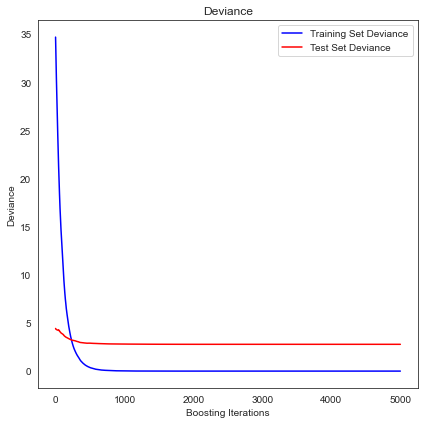

CPU times: total: 8.09 s
Wall time: 12.6 s


In [28]:
%%time
gbr = gradient_boosting_regression(X,y)